# **GameDev Match-3 Player Analysis**
## The project goal: analyze the dataset to uncover valuable insights and improve marketing efficiency.
Analysis should include:
- analysis of the level progression of players
- examining player performance metrics
- identifying areas for enhancement

The analysis can be carried out by answering the following questions:
- How good is the data quality?
- What is the complexity of levels?
- What is complete and pass rate by levels?
- Are there any cheaters in the game?
- What is the "funnel" of passing the levels of a new user after installing the game?
- How can answers to all these questions help a business?

## 1. Uploading data 

In [2]:
import pandas as pd

# Reading the csv file and creating dataframe, using correct delimiter
df = pd.read_csv('plr_smpl_attempts.csv', delimiter = ';')

# Displaying the first few rows
df.head()

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,"1,51209E+12"
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,"1,51209E+12"
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,"1,51209E+12"
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,"1,51209E+12"
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,"1,51209E+12"


## 2. Data Wrangling
**To clean, organize, and prepare raw data into a usable format**:
- check data types
- check for missing values
- check duplicates and remove them
- fix formatting issues (e.g. replacing commas with dots)
- convert data types to correct types
- rename columns (if needed)
- create new columns (if needed)

In [3]:
# Get basic info about the data and data types in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         19999 non-null  object
 1   action      19999 non-null  object
 2   level       19999 non-null  int64 
 3   event_time  19999 non-null  object
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


In [4]:
# Check for missing values
df.isnull().sum()

uid           0
action        0
level         0
event_time    0
dtype: int64

In [5]:
# Check for duplicates
f"Duplicates before cleaning: {df.duplicated().sum()}"

'Duplicates before cleaning: 12003'

In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)
f"Duplicates after cleaning: {df.duplicated().sum()}"

'Duplicates after cleaning: 0'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 19995
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         7996 non-null   object
 1   action      7996 non-null   object
 2   level       7996 non-null   int64 
 3   event_time  7996 non-null   object
dtypes: int64(1), object(3)
memory usage: 312.3+ KB


In [8]:
# Converting event_time to the readable format and ensuring proper data type
# 1. Fix formatting: convert to string and replace comma with dot
df['event_time'] = df['event_time'].astype(str).str.replace(',', '.')

# 2. Convert string to float
df['event_time'] = df['event_time'].astype(float) / 1000

# 3. Convert Unix timestamp to datetime
df['event_time'] = pd.to_datetime(df['event_time'], unit='s')

# 4. Check if the data type of 'even_time' has changed
df['event_time'].dtype

dtype('<M8[ns]')

In [9]:
# rechecking data format
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 19995
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   uid         7996 non-null   object        
 1   action      7996 non-null   object        
 2   level       7996 non-null   int64         
 3   event_time  7996 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 312.3+ KB


,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 01:00:00
5,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 14:53:20
12,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 17:40:00
15,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,114,2017-12-01 20:26:40
18,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,114,2017-12-01 17:40:00


In [10]:
# rename columns 
df.columns = ['user_id', 'action', 'level', 'event_time']

df.head()

,user_id,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 01:00:00
5,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 14:53:20
12,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 17:40:00
15,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,114,2017-12-01 20:26:40
18,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,114,2017-12-01 17:40:00


In [11]:
# create new columns for EDA
df['date'] = df['event_time'].dt.date
df['hour'] = df['event_time'].dt.hour
df['weekday'] = df['event_time'].dt.day_name()

df.head()

,user_id,action,level,event_time,date,hour,weekday
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 01:00:00,2017-12-01,1,Friday
5,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 14:53:20,2017-12-01,14,Friday
12,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,2017-12-01 17:40:00,2017-12-01,17,Friday
15,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,114,2017-12-01 20:26:40,2017-12-01,20,Friday
18,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,114,2017-12-01 17:40:00,2017-12-01,17,Friday


## Midterm summary: results of data wrangling
The **data wrangling** process allowed us to study and organize the structure of the dataset and the data types in the columns, and also assess data quality:
- The original dataset had **the same number of records (19999) in each column**, which shows that the **dataset is complete**
- There are **no missing values** or NULL entries in any of the columns
- There were detected **12003 duplicates** which **were removed**
- The **"event_time" column was converted** to a more readable format from data type "object" **to "datetime64[ns]"**

Two additional actions were taken, such as changing the column name for better readability and adding additional columns for further analysis:
- The **column "uid" was renamed** to "user_id"
- **New columns were added**: 'date', 'hour', 'weekday'

## 3. Exploratory Data Analysis (EDA)
**To understand the patterns, structure, and distributions in the cleaned dataset**
- check value counts
- visualize distributions (distribution of actions, level)
- describe numeric columns
- explore trends over categories or time (using groupings and aggregations)
- check correlations
- explore outliers 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
# Check value counts
# Number of action by action type and weekday
action_counts = df['action'].value_counts()
weekday_counts = df['weekday'].value_counts()

# Number of unique users
num_users = df['user_id'].nunique()

print("Action counts:\n", action_counts)
print("\nWeekday counts:\n", weekday_counts)
print("\nNumber of users:", num_users)

Action counts:
 action
failed       4919
completed    3077
Name: count, dtype: int64

Weekday counts:
 weekday
Friday    7996
Name: count, dtype: int64

Number of users: 1349


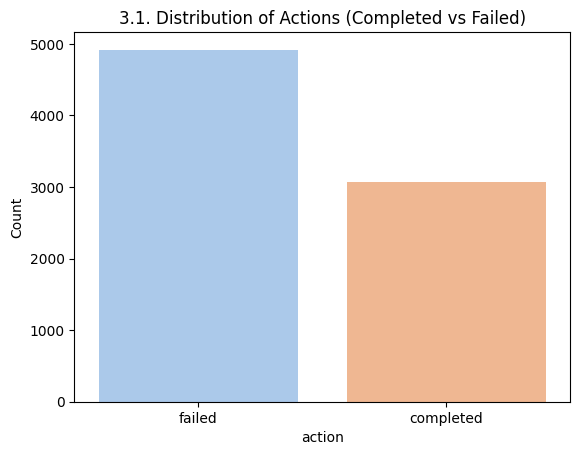

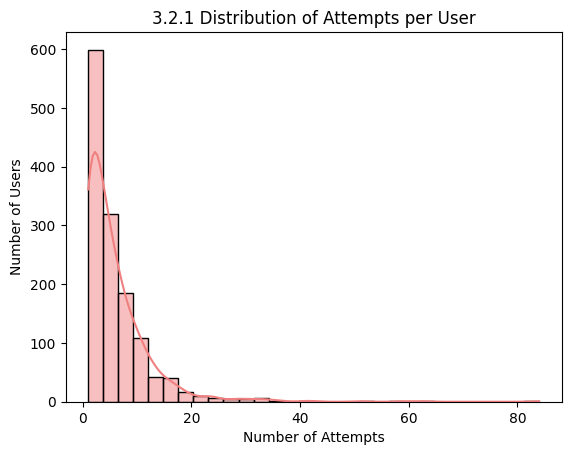

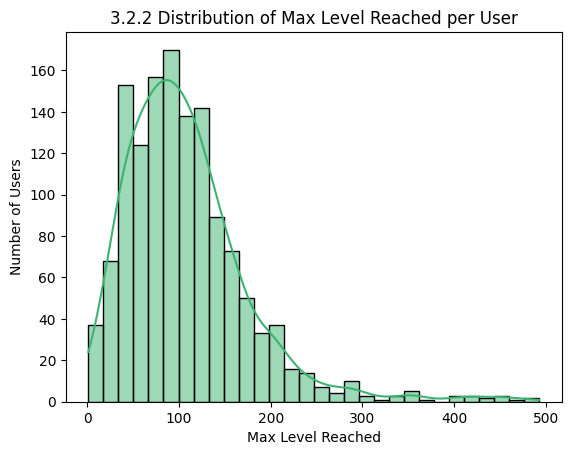

In [79]:
# Understanding and visualizing distribution of actions, level distribution, user-level interactions
# 3.1. Distribution of actions
plt.figure()
sns.countplot(data=df, x='action', hue='action', palette='pastel', legend=False)
plt.title('3.1. Distribution of Actions (Completed vs Failed)')
plt.ylabel('Count')
plt.show()

# 3.2 User-level interactions
# 3.2.1 Distribution of attempts per user
user_attempts = df.groupby('user_id')['level'].count()

sns.histplot(user_attempts, bins=30, kde=True, color='lightcoral')
plt.title('3.2.1 Distribution of Attempts per User')
plt.xlabel('Number of Attempts')
plt.ylabel('Number of Users')
plt.show()

# 3.2.2 Max level reached per user
max_level = df.groupby('user_id')['level'].max()

sns.histplot(max_level, bins=30, kde=True, color='mediumseagreen')
plt.title('3.2.2 Distribution of Max Level Reached per User')
plt.xlabel('Max Level Reached')
plt.ylabel('Number of Users')
plt.show()

In [24]:
# Max level reached per user
user_max_level = df.groupby('user_id')['level'].max().sort_values(ascending=False)
user_max_level

user_id
NFQ2NU9GRnU4NTEzNzE3MTAyMDE1MA    493
R2w1MjRHUTg2NDUxNDE3MTAyOTAyMg    480
WHlZcWpnemcxMTQyNTE3MTAyOTAzMg    465
dUFudTZJbVo3MjgxOTA3MTAyOTAyMg    459
dFowR05mMloxMDkzOTA3MTAyMDEwMg    455
                                 ... 
TGlsSUJLRzEwNTEwNzE3MTAyMjExMA      2
bVVzaGJvak4yMTczOTE3MTAyMTEwMw      2
QmNHdFN4TEQ3NTYxNDE3MTAyMTExMQ      1
YkZ0a2dIaVQ0MTM1MTI3MTAyMjExMA      1
WTFkeEhZZ0Y5Mjg0NjE3MTAyMjExMA      1
Name: level, Length: 1349, dtype: int64

In [20]:
# Describing numeric columns
numeric_description = df.describe()
numeric_description

,level,event_time,hour
count,7996.000000,7996,7996.000000
mean,113.091296,2017-12-01 12:08:52.566283008,11.676463
min,1.000000,2017-12-01 01:00:00,1.000000
25%,55.000000,2017-12-01 06:33:20,6.000000
50%,100.000000,2017-12-01 12:06:40,12.000000
75%,143.000000,2017-12-01 17:40:00,17.000000
max,493.000000,2017-12-01 23:13:20,23.000000
std,83.751032,NaN,6.694345


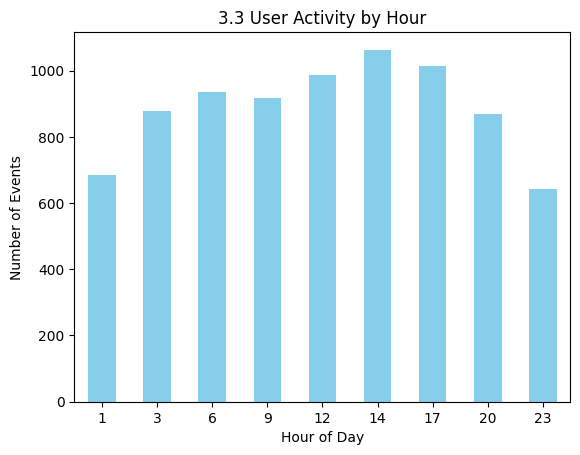

In [80]:
# Exploring trends by groups using aggregations
# User Activity by Hour
hourly_activity = df.groupby('hour')['user_id'].count()
hourly_activity.plot(kind='bar', color='skyblue')
plt.title('3.3 User Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.show()


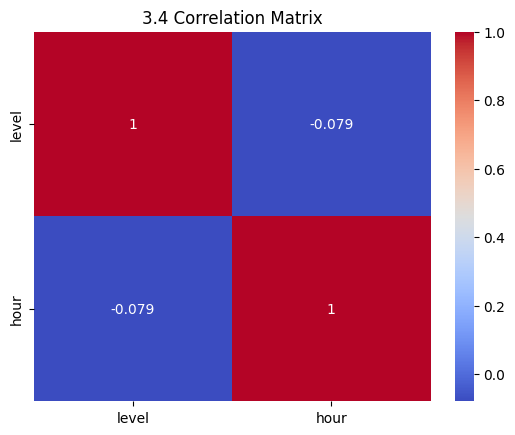

In [81]:
# Check correlations between numeric fields
correlation = df[['level', 'hour']].corr()

plt.figure()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('3.4 Correlation Matrix')
plt.show()

In [23]:
# Check for outliers: count attempts per user
user_attempts = df.groupby('user_id')['level'].count().sort_values(ascending=False)


# Average attempts per user
avg_attempts = user_attempts.mean()


# Max attempts by a single user
max_attempts = user_attempts.max()

user_attempts, f"Average attempts per user: {avg_attempts:.1f}", f"Max attempts per user: {max_attempts:.0f}"

(user_id
 VnVVQzVjS0QzMzk0MzI3MTAyMTEwMw    84
 UzZFdks1dVQ4NDcwNTE3MTAyMTEwMw    62
 U2pyRUtHSjY3MTgzNjE3MTAyMTEwMw    59
 UWhnOTVYYUYzMTk1MzE3MTAyMjExMA    51
 NlB0d0xDZ3MwMzgzOTA3MTAyMDE0MA    42
                                   ..
 eVBvNUlzOFgzNTgzODE3MTAyMDExMQ     1
 MGZjeHFkVHczMTIxMjI3MTAyOTA4Mg     1
 NTRHUkJ0TjE1MDAzNjE3MTAyMDEwMQ     1
 N3BTOG1zcU82MjcxNDE3MTAyMDEwMg     1
 N3VER1NFeXgzMzgwMDA3MTAyOTAwMw     1
 Name: level, Length: 1349, dtype: int64,
 'Average attempts per user: 5.9',
 'Max attempts per user: 84')

In [25]:
# Number of levels completed by user
user_completed = df[df['action'] == 'completed'].groupby('user_id')['level'].nunique().sort_values(ascending=False)

# Average number of levels completed by user
avg_completed_levels = user_completed.mean()
median_completed_levels = user_completed.median()

user_completed, f"Average number of levels completed by user: {avg_completed_levels:.1f}", f"Median number of levels completed by user: {median_completed_levels:.1f}"

(user_id
 VnVVQzVjS0QzMzk0MzI3MTAyMTEwMw    53
 U2pyRUtHSjY3MTgzNjE3MTAyMTEwMw    39
 UWhnOTVYYUYzMTk1MzE3MTAyMjExMA    37
 QlhFWEdWTDQ1MzQwMjA3MTAyMjExMA    30
 UzZFdks1dVQ4NDcwNTE3MTAyMTEwMw    25
                                   ..
 UWpBaVB6SGgwMDQ1OTE3MTAyOTAzMg     1
 UFE1bjFDNUI0NTI1MjI3MTAyOTA4Mg     1
 UFE2ZW5MQ2w2MTg1NTE3MTAyMDE0MA     1
 UFFXckpNdDY0NDYzMzI3MTAyMDE0MA     1
 UFZwTnJsZDg1NTkxMjI3MTAyMTE5Mg     1
 Name: level, Length: 866, dtype: int64,
 'Average number of levels completed by user: 3.5',
 'Median number of levels completed by user: 2.0')

In [46]:
# Results of EDA analysis
print(f"""Results of EDA analysis (briefly):
1. Total events: {df.shape[0]}
2. Unique users: {num_users}
3. Action distribution: {action_counts.to_dict()}
4. All events occurred on: {', '.join(weekday_counts.index.tolist())}
5. Average user made ~{avg_attempts:.1f} attempts
6. Max attempts by a single user: {max_attempts}
7. Average number of levels completed by a user: {avg_completed_levels:.1f}
8. Max number of levels completed by a single user: {user_completed.max()}
9. Max level reached by a user: {user_max_level.max()}
10. Most user activity is between 12:00 and 17:00
""")

Results of EDA analysis (briefly):
1. Total events: 7996
2. Unique users: 1349
3. Action distribution: {'failed': 4919, 'completed': 3077}
4. All events occurred on: Friday
5. Average user made ~5.9 attempts
6. Max attempts by a single user: 84
7. Average number of levels completed by a user: 3.5
8. Max number of levels completed by a single user: 53
9. Max level reached by a user: 493
10. Most user activity is between 12:00 and 17:00



### **Midterm summary - EDA results**
**Main points:**
- Based on EDA analysis, we see that all **7996 events** happened on **Friday**
- There are **4919 failed** and **3077 completed** actions across **1349 unique users**
- Average user made **~6 attempts to pass the level**. The highest number of attempts made by a user in a day was 84 attempts
- Distribution of Levels Completed per User shows, that most users out of the total number of users (1349) completed less than 10 levels per day. On average, **each user completed 3 to 4 levels per day**
- The **maximum number of levels completed** by a single user in a day was **53 levels**
- The **maximum level reached** by the user was **level 493**, while on average most users only reach levels 40-140, which is shown on plot "3.2.2 Distribution of Max Level Reached per User"
- Exploring User activity by hour showed that **players are mostly active at midday from 12:00 and 17:00**
- There is a weak correlation between level and hour — not much insight here

## 4. Calculating metrics
- 4.1. Complexity of levels
- 4.2. Completion/pass rate by level
- 4.3. Cheater detection
- 4.4. Funnel analysis


### 4.1 Complexity of levels
- finding hardest and easiest levels

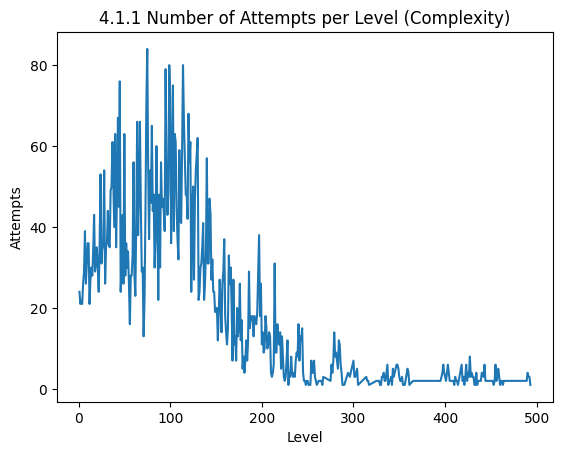

In [82]:
# 4.1.1 Number of attempts per level
level_counts = df['level'].value_counts().sort_index()
plt.figure()
sns.lineplot(x=level_counts.index, y=level_counts.values)
plt.title('4.1.1 Number of Attempts per Level (Complexity)')
plt.xlabel('Level')
plt.ylabel('Attempts')
plt.show()

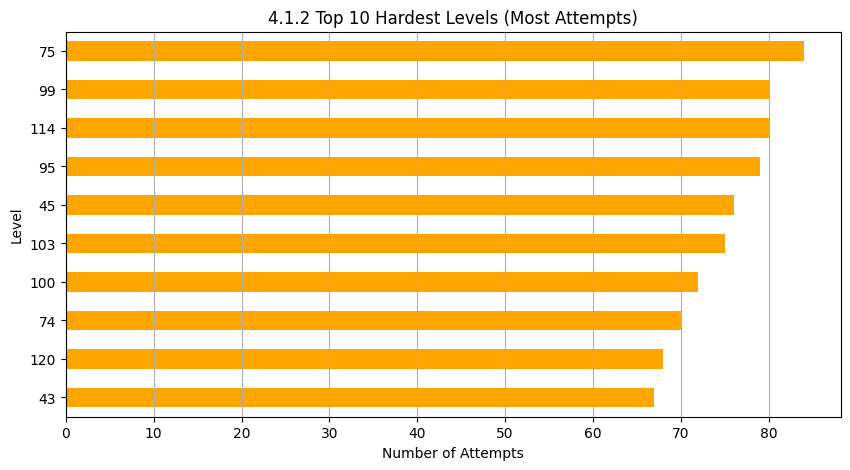

level
75     84
99     80
114    80
95     79
45     76
103    75
100    72
74     70
120    68
43     67
Name: count, dtype: int64

In [83]:
# 4.1.2 Top 10 Hardest Levels (Most Attempts)

# Total attempts per level
level_attempts = df['level'].value_counts().sort_values(ascending=False)
top_10_hardest = level_attempts.head(10).sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 5))
top_10_hardest.plot(kind='barh', color='orange')
plt.title('4.1.2 Top 10 Hardest Levels (Most Attempts)')
plt.xlabel('Number of Attempts')
plt.ylabel('Level')
plt.grid(axis='x')
plt.show()

# list in descending order
top_10_hardest[::-1]  

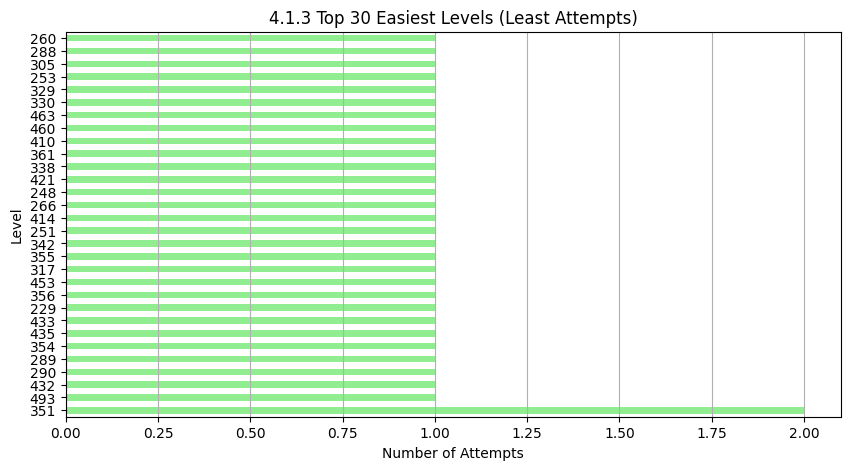

level
260    1
288    1
305    1
253    1
329    1
330    1
463    1
460    1
410    1
361    1
338    1
421    1
248    1
266    1
414    1
251    1
342    1
355    1
317    1
453    1
356    1
229    1
433    1
435    1
354    1
289    1
290    1
432    1
493    1
351    2
Name: count, dtype: int64

In [84]:
# 4.1.3 Top 30 Easiest Levels (Least Attempts)
# Filter out levels with at least 1 attempt
least_attempted = level_attempts[level_attempts > 0].tail(30).sort_values(ascending=False)

# Plotting 
plt.figure(figsize=(10, 5))
least_attempted.plot(kind='barh', color='lightgreen')
plt.title('4.1.3 Top 30 Easiest Levels (Least Attempts)')
plt.xlabel('Number of Attempts')
plt.ylabel('Level')
plt.grid(axis='x')
plt.show()

least_attempted[::-1]

In [33]:
# Percentile/Range Analysis

level_attempts = df['level'].value_counts().sort_index()

# Get percentiles of level attempt counts
percentiles = level_attempts.quantile([0.25, 0.5, 0.75, 0.9])
percentiles

for p, val in percentiles.items():
    print(f"{int(p*100)}th percentile: {val:.1f} attempts")

25th percentile: 3.0 attempts
50th percentile: 13.0 attempts
75th percentile: 33.0 attempts
90th percentile: 49.5 attempts


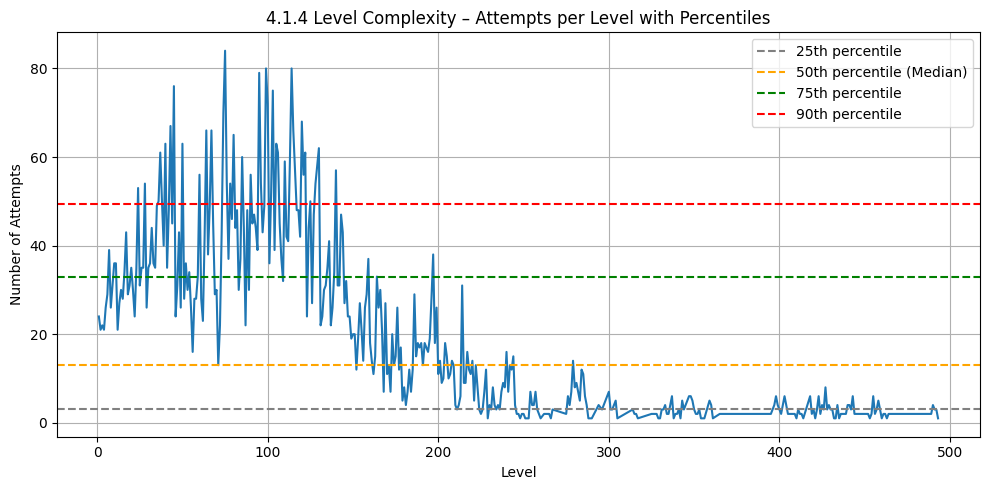

In [85]:
# Plot Number of Attempts per Level with percentile lines
plt.figure(figsize=(10, 5))
sns.lineplot(x=level_attempts.index, y=level_attempts.values)
plt.axhline(percentiles[0.25], color='gray', linestyle='--', label='25th percentile')
plt.axhline(percentiles[0.5], color='orange', linestyle='--', label='50th percentile (Median)')
plt.axhline(percentiles[0.75], color='green', linestyle='--', label='75th percentile')
plt.axhline(percentiles[0.9], color='red', linestyle='--', label='90th percentile')
plt.title('4.1.4 Level Complexity – Attempts per Level with Percentiles')
plt.xlabel('Level')
plt.ylabel('Number of Attempts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.2. Completion/pass rate by level

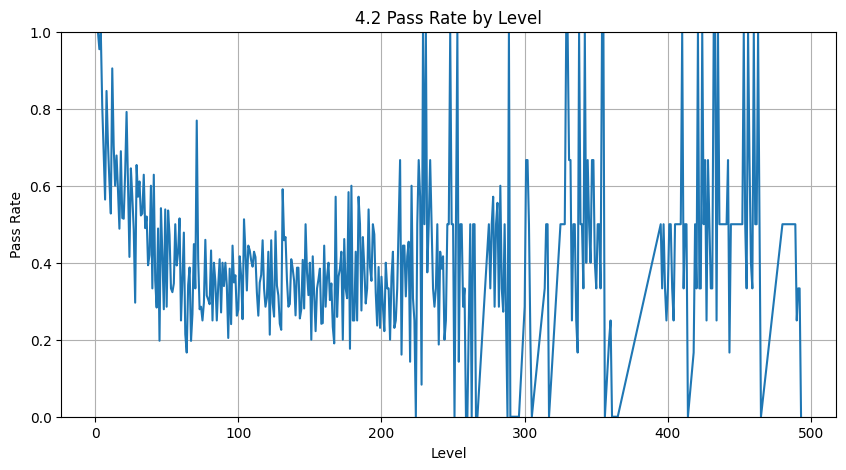

('Average pass rate across levels: 42.78%',
 'Overall pass rate in dataset: 38.48%')

In [86]:
# Group by level and action (completed/failed)
level_outcomes = df.groupby(['level', 'action'])['user_id'].count().unstack().fillna(0)

# Total attempts and pass rate per level
level_outcomes['total'] = level_outcomes.sum(axis=1)
level_outcomes['pass_rate'] = level_outcomes['completed'] / level_outcomes['total']

# Ploting pass rate per level
plt.figure(figsize=(10, 5))
sns.lineplot(data=level_outcomes, x=level_outcomes.index, y='pass_rate')
plt.title('4.2 Pass Rate by Level')
plt.xlabel('Level')
plt.ylabel('Pass Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Average and overall pass rates
avg_pass_rate = level_outcomes['pass_rate'].mean()
overall_pass_rate = df[df['action'] == 'completed'].shape[0] / df.shape[0]

f"Average pass rate across levels: {avg_pass_rate:.2%}", f"Overall pass rate in dataset: {overall_pass_rate:.2%}"

In [36]:
# Identifying high-attempt but low-pass-rate levels

# Filtering levels with high attempts but low pass rate
high_attempts_low_pass = level_outcomes[
    (level_outcomes['total'] > level_outcomes['total'].median()) &
    (level_outcomes['pass_rate'] < level_outcomes['pass_rate'].median())
].sort_values(by='pass_rate')

# Top 10 with high attempts but low pass rate
high_attempts_low_pass[['completed', 'failed', 'total', 'pass_rate']].head(10)

action,completed,failed,total,pass_rate
level,,,,
220,2.0,12.0,14.0,0.142857
214,5.0,26.0,31.0,0.161290
64,11.0,55.0,66.0,0.166667
178,3.0,14.0,17.0,0.176471
240,3.0,13.0,16.0,0.187500
167,4.0,17.0,21.0,0.190476
67,13.0,53.0,66.0,0.196970
45,15.0,61.0,76.0,0.197368
173,4.0,16.0,20.0,0.200000


In [37]:
# Top 10 easiest levels by pass rate (highest pass rate)
top_10_easiest = level_outcomes.sort_values(by='pass_rate', ascending=False).head(10)

# Top 10 hardest levels by pass rate (lowest pass rate)
top_10_hardest = level_outcomes.sort_values(by='pass_rate', ascending=True).head(10)

print("Top 10 Easiest Levels by Pass Rate:")
display(top_10_easiest[['completed', 'failed', 'total', 'pass_rate']])

print("Top 10 Hardest Levels by Pass Rate:")
display(top_10_hardest[['completed', 'failed', 'total', 'pass_rate']])

Top 10 Easiest Levels by Pass Rate:


action,completed,failed,total,pass_rate
level,,,,
463,1.0,0.0,1.0,1.0
1,24.0,0.0,24.0,1.0
2,21.0,0.0,21.0,1.0
435,1.0,0.0,1.0,1.0
433,1.0,0.0,1.0,1.0
432,1.0,0.0,1.0,1.0
424,2.0,0.0,2.0,1.0
421,1.0,0.0,1.0,1.0
410,1.0,0.0,1.0,1.0


Top 10 Hardest Levels by Pass Rate:


action,completed,failed,total,pass_rate
level,,,,
493,0.0,1.0,1.0,0.0
465,0.0,2.0,2.0,0.0
356,0.0,1.0,1.0,0.0
414,0.0,1.0,1.0,0.0
361,0.0,1.0,1.0,0.0
317,0.0,1.0,1.0,0.0
365,0.0,2.0,2.0,0.0
251,0.0,1.0,1.0,0.0
305,0.0,1.0,1.0,0.0


### 4.3. Cheater detection

In [74]:
# Number of unique levels completed per user
completed_levels = df[df['action'] == 'completed'].groupby('user_id')['level'].nunique()

# Time range for each user (min/max event_time)
user_time = df.groupby('user_id')['event_time'].agg(['min', 'max'])
user_time['duration_minutes'] = (user_time['max'] - user_time['min']).dt.total_seconds() / 60

# Merging with completion data
cheater_df = completed_levels.to_frame().merge(user_time, left_index=True, right_index=True)
cheater_df.columns = ['unique_levels_completed', 'start_time', 'end_time', 'duration_minutes']

# Defining possible cheaters: completed more than 1 level in 0 minutes
possible_cheaters = cheater_df[(cheater_df['unique_levels_completed'] > 1) & (cheater_df['duration_minutes'] == 0)]


possible_cheaters.sort_values(by='unique_levels_completed', ascending=False)

,unique_levels_completed,start_time,end_time,duration_minutes
user_id,,,,
bXk1NWlrMk84MDIxMDA3MTAyMjEyMA,24,2017-12-01 17:40:00,2017-12-01 17:40:00,0.0
TTBkTHlHNWsyNDg1MzE3MTAyMTE4Mg,17,2017-12-01 06:33:20,2017-12-01 06:33:20,0.0
QWNhMklvb0k4NTcwMDE3MTAyMTE3Mg,11,2017-12-01 14:53:20,2017-12-01 14:53:20,0.0
TTd1NnpOZm0xMTUwNTE3MTAyMjExMA,9,2017-12-01 12:06:40,2017-12-01 12:06:40,0.0
MkRWZkk0dDc5NDUzNjE3MTAyMTEyMg,9,2017-12-01 20:26:40,2017-12-01 20:26:40,0.0
...,...,...,...,...
dlhZYzgycms2MTE1MDA3MTAyMDExMA,2,2017-12-01 06:33:20,2017-12-01 06:33:20,0.0
eXkwUDFsOEgyMzY1NzA3MTAyMDE2MQ,2,2017-12-01 14:53:20,2017-12-01 14:53:20,0.0
ejJwQTR1QTU3NTA1MDI3MTAyMDE1MA,2,2017-12-01 03:46:40,2017-12-01 03:46:40,0.0


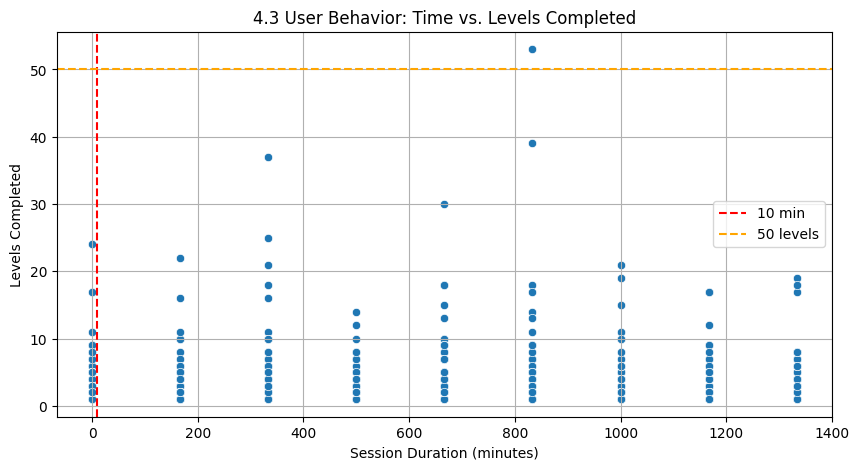

In [88]:
# User Behavior: Time vs. Levels Completed
plt.figure(figsize=(10, 5))
sns.scatterplot(data=cheater_df, x='duration_minutes', y='unique_levels_completed')
plt.axvline(10, color='red', linestyle='--', label='10 min')
plt.axhline(50, color='orange', linestyle='--', label='50 levels')
plt.title('4.3 User Behavior: Time vs. Levels Completed')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Levels Completed')
plt.legend()
plt.grid(True)
plt.show()

### 4.4. Funnel analysis

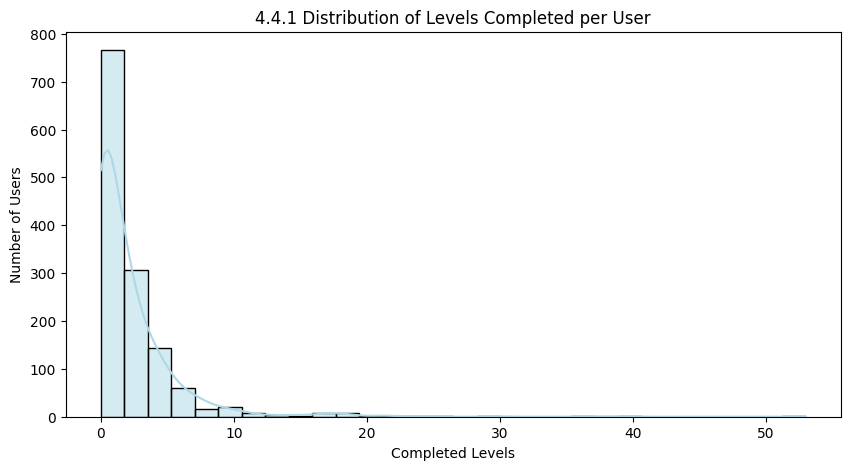

In [89]:
# User completion distribution
plt.figure(figsize=(10, 5))
sns.histplot(user_completed, bins=30, kde=True, color='lightblue')
plt.title('4.4.1 Distribution of Levels Completed per User')
plt.xlabel('Completed Levels')
plt.ylabel('Number of Users')
plt.show()

In [43]:
# Count of users who completed at least 5, 10, and 20 levels
# Get all user IDs
all_users = df['user_id'].unique()

# Reindex to include users with 0 completions
user_completed = user_completed.reindex(all_users, fill_value=0)

# Defining the bins for 1-5, 1-10, and 1-20 levels
bins = [-1, 0, 5, 10, 20, user_completed.max()]  # -1 to include 0 in first bin
labels = ['0 levels', '1-5 levels', '6-10 levels', '11-20 levels', '21+ levels']

# Categorizing users based on the number of completed levels
user_bins = pd.cut(user_completed, bins=bins, labels=labels, right=True)

# Counting users in each bin
user_bin_counts = user_bins.value_counts().sort_index()

# Calculating percentage of users in each bin
user_bin_percentages = (user_bin_counts / len(all_users)) * 100


user_bin_counts, user_bin_percentages

(level
 0 levels        483
 1-5 levels      733
 6-10 levels      97
 11-20 levels     27
 21+ levels        9
 Name: count, dtype: int64,
 level
 0 levels        35.804299
 1-5 levels      54.336546
 6-10 levels      7.190511
 11-20 levels     2.001483
 21+ levels       0.667161
 Name: count, dtype: float64)

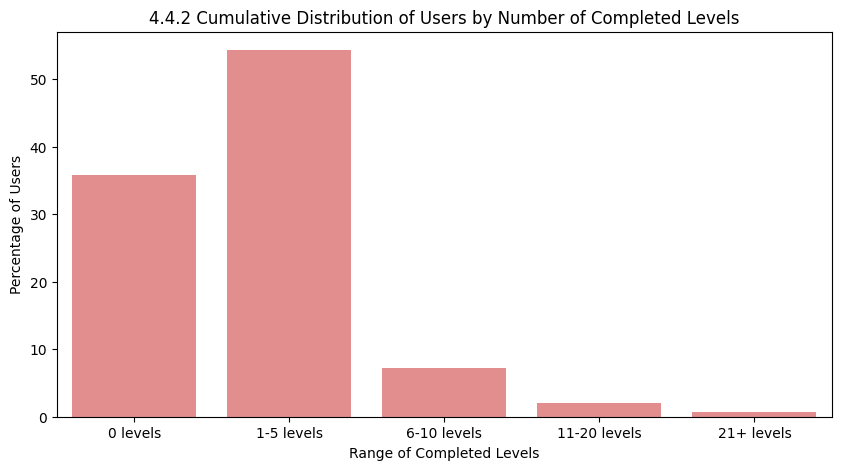

In [90]:
# The cumulative distribution as a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=user_bin_counts.index, y=user_bin_percentages, color='lightcoral')
plt.title('4.4.2 Cumulative Distribution of Users by Number of Completed Levels')
plt.xlabel('Range of Completed Levels')
plt.ylabel('Percentage of Users')
plt.xticks(rotation=0)
plt.show()

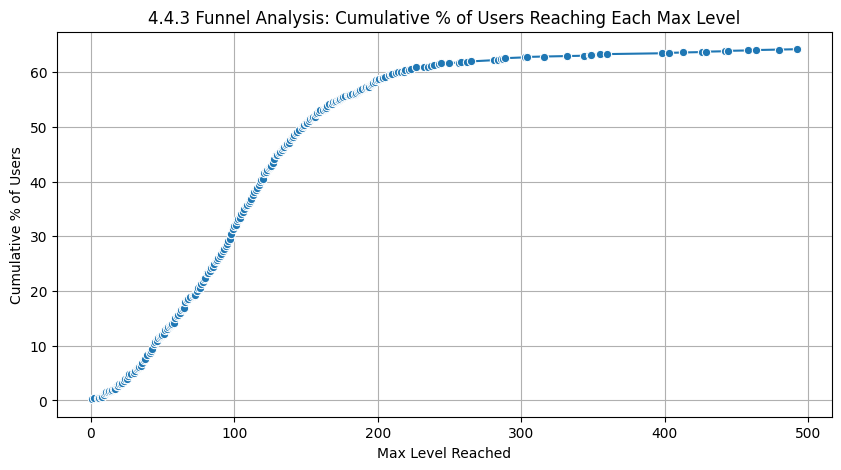

In [91]:
# Max level completed per user
user_funnel = df[df['action'] == 'completed'].groupby('user_id')['level'].max()

# How many users reached each level
funnel_data = user_funnel.value_counts().sort_index().cumsum()

# Converting to percentage
funnel_percentage = (funnel_data / df['user_id'].nunique()) * 100

# Ploting funnel
plt.figure(figsize=(10, 5))
sns.lineplot(x=funnel_percentage.index, y=funnel_percentage.values, marker='o')
plt.title('4.4.3 Funnel Analysis: Cumulative % of Users Reaching Each Max Level')
plt.xlabel('Max Level Reached')
plt.ylabel('Cumulative % of Users')
plt.grid(True)
plt.show()

## **Summary of metrics calculation**
- A total of 493 levels were analyzed

### 4.1 Complexity of Levels analysis showed, that:
- The Level (Complexity) distribution visualizations show a **sharp peak with the highest concentration of attempts between levels 20 and 130**.
- After level 150, the number of attempts drops off significantly — likely due to **user churn** or **decreasing player base at higher levels**.
- The **top 10 hardest levels** (with the most attempts) were mostly in the 90–115 range, suggesting difficulty spikes in early-mid game
- Top 10 hardest levels are: 75 (>80 attempts); 99, 114, 95, 45, 103, 100, 74 (70-80 attempts), 120, 43 (60-70 attempts)
- The **least attempted levels** are mid-game and late-game (above level 229), which makes sense as only a small fraction of users reach them
- Percentile analysis confirms:
  - 25% of levels had fewer than ~3 attempts
  - 50% had fewer than ~13 attempts
  - Only 10% of levels had more than ~50 attempts
  
### 4.2 Completion/pass rate by level
- The pass rate starts **very high at early levels (above 80–90%)**, indicating the first levels are relatively easy, which is important for onboarding and user retention
- From level 10 to about level 70, the **pass rate gradually drops** to about **30–40%**, reflecting a well-paced increase in difficulty
- Between levels 70 and 210, the pass rate stabilizes around **30–40%**
- **Beyond level 210**, we observe significant **drops and hops in pass rates** that vary across levels. But the main trend is that for most levels after level 120 the pass rate remains at **30-50%**
- **Average pass rate across levels** is **42.78%**, which means that on average, players complete ~43% of the levels they attempt. This is reasonable but shows that the levels are challenging and it may lead to early drop-offs
- The **overall pass rate** is slightly lower, at **38.48%**, accounting for retries and early drop-offs. That means, that at all events (completed + failed), only ~38.5% of them are wins
- Analysis of "High-Attempt but Low-Pass-Rate" levels shows, that these are potential “frustration points” where users spend time but fail — they may cause drop-offs.

### 4.3. Cheater detection
- Player session durations and the number of levels completed were analyzed to identify potentially suspicious or automated behavior.
- There were selected users who completed **more than 1 level** and whose total **session duration was exactly 0 minutes** (i.e., their first and last event timestamps were identical).
- As the result, there were identified **111 users** matching this criteria. Many of them completed 10+ levels, with one user completing **24 levels in 0 minutes** which is clearly unrealistic.
  This may indicate:
  - Scripted or automated activity (bot usage)
  - Server logging errors (events all recorded at the same timestamp)
  - Internal testing accounts running fast skips
- In the scatter plot of “4.3 User Behavior: Time vs. Levels Completed”, these users appear **stacked on the vertical axis at 0 minutes**, with varying completion counts.

### 4.4. Funnel analysis
- The overall percentage of **users who completed at least 5 levels per day was 54%**, but there was also a large number of **users who did not complete a single level per day - 35% of users**, which shows that users drop off quickly
- The graph "4.4.3 Funnel Analysis: Cumulative % of Users Reaching Each Max Level" confirms that after level 200 the difficulty of the levels increases and the number of users who reach the next levels decreases significantly

## **Final Conclusions**
**My findings and suggestions for improvement**
1. Since all data events happened on a Friday, the dataset represents a partial time sample (from a single day). This limits time-based analysis like weekly trends. **For a broader time analysis, more data by day of the week can be added** and the progression of users can be studied better
2. The analysis allows selecting top users to identify the best players, which can be used to allocate bonuses
3. Since the game experiences **the highest engagement** in the **early to mid-game** (levels 1–150), especially 70–115, where is the concentration of the **most difficult levels** by attempts and after level 150, engagement drops rapidly, likely due to player fatigue or churn, game developers should consider **re-balancing early-mid levels to prevent drop-off**. **Investigation of high-attempt levels** can be helpful to find the potential design flaws and improve it.
   - The analysis of "High-Attempt but Low-Pass-Rate" is useful for finding problematic levels that a lot of people play but few succeed at. Reviewing these levels' design could help improve user flow and retention. Thus, frequently played levels with very low win rate (less than 20%) might be rebalanced to reduce churn.
4. Cheater detection analysis allowed detecting **111 users** who completed multiple levels in **0 minutes**, an impossible scenario under normal gameplay. These outliers likely include **bots, automated scripts, or test accounts**, and should be excluded from player progression and funnel analysis. Game developers should ensure accurate timestamping of events by **separating internal/test accounts** from production user data or by **creating automated detection filters** such as building a process to detect anomalies (e.g., >1 levels in 0 minutes).
5. Retention funnel shows steep loss between levels 5 and 20 — a critical area for design focus. There can be conducted A/B tests with adjusted difficulty, reward systems, or tutorials to improve retention in early levels.